In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
# Load dataset
df = pd.read_csv("creditcard.csv")

In [5]:
# Display basic info
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
# Features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]


In [21]:
# Normalize 'Amount' feature
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions
y_pred = clf.predict(X_test)

In [31]:
# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[56847    17]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



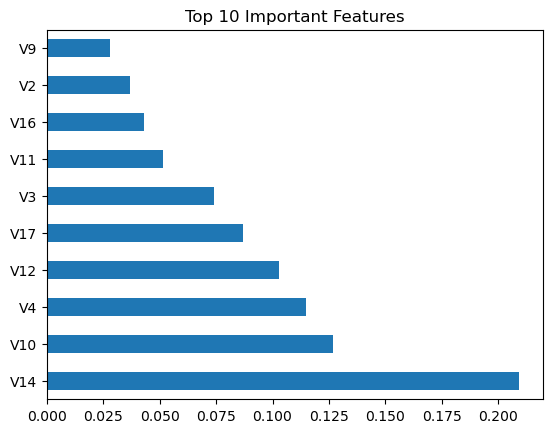

In [33]:
# Plot feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()

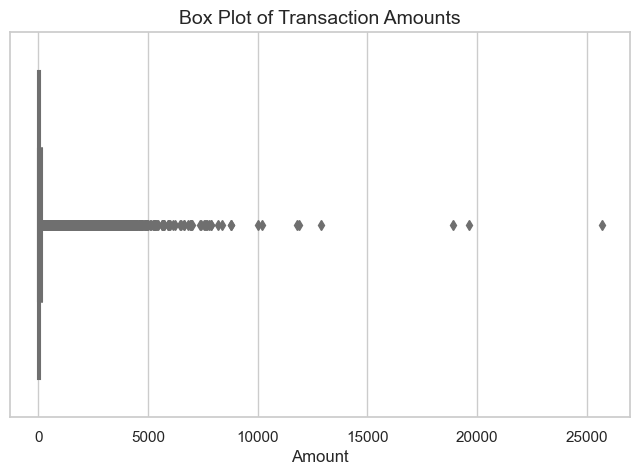

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Amount"], color="skyblue")

# Title and labels
plt.title("Box Plot of Transaction Amounts", fontsize=14)
plt.xlabel("Amount", fontsize=12)

# Show plot
plt.show()


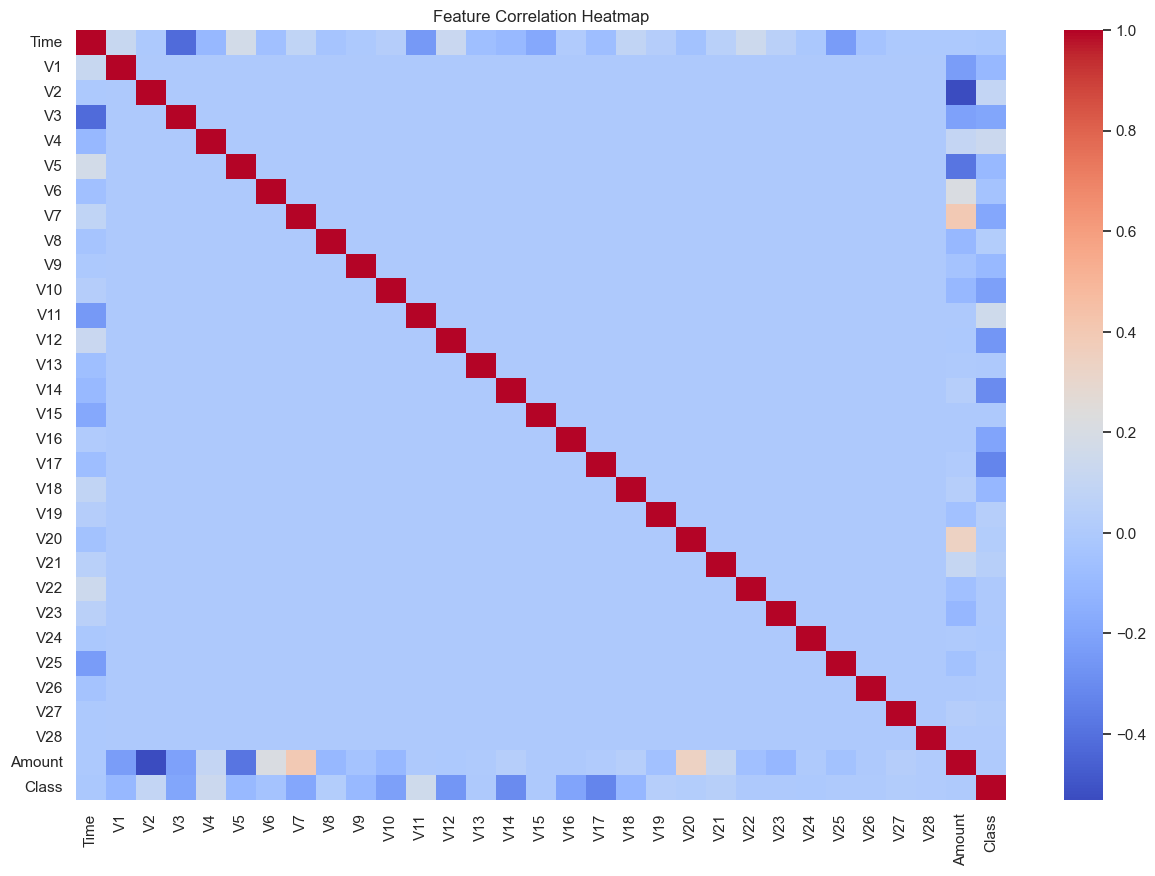

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(15, 10))

# Generate heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")

# Title for the heatmap
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()


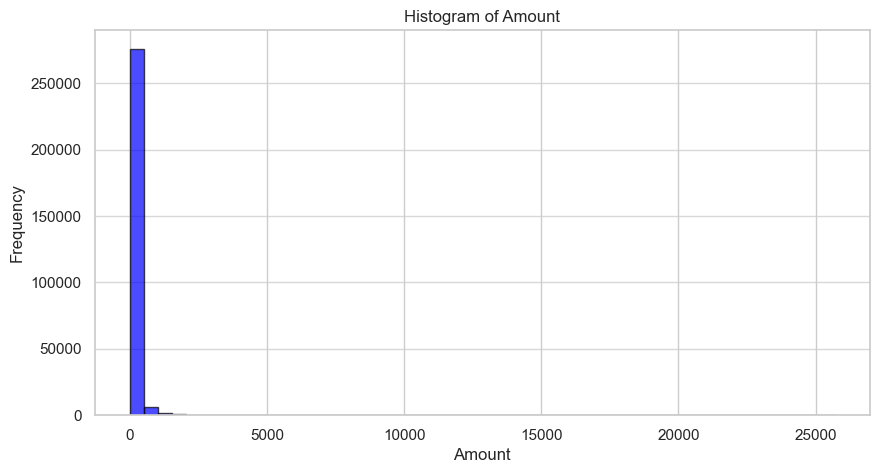

In [39]:

import matplotlib.pyplot as plt

# Choose a numerical column to plot (replace 'Amount' with your preferred column)
column_name = "Amount"  # Change this to another numerical column if needed

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(df[column_name], bins=50, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title(f"Histogram of {column_name}")
plt.grid(axis="y", alpha=0.75)

# Show the plot
plt.show()


C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

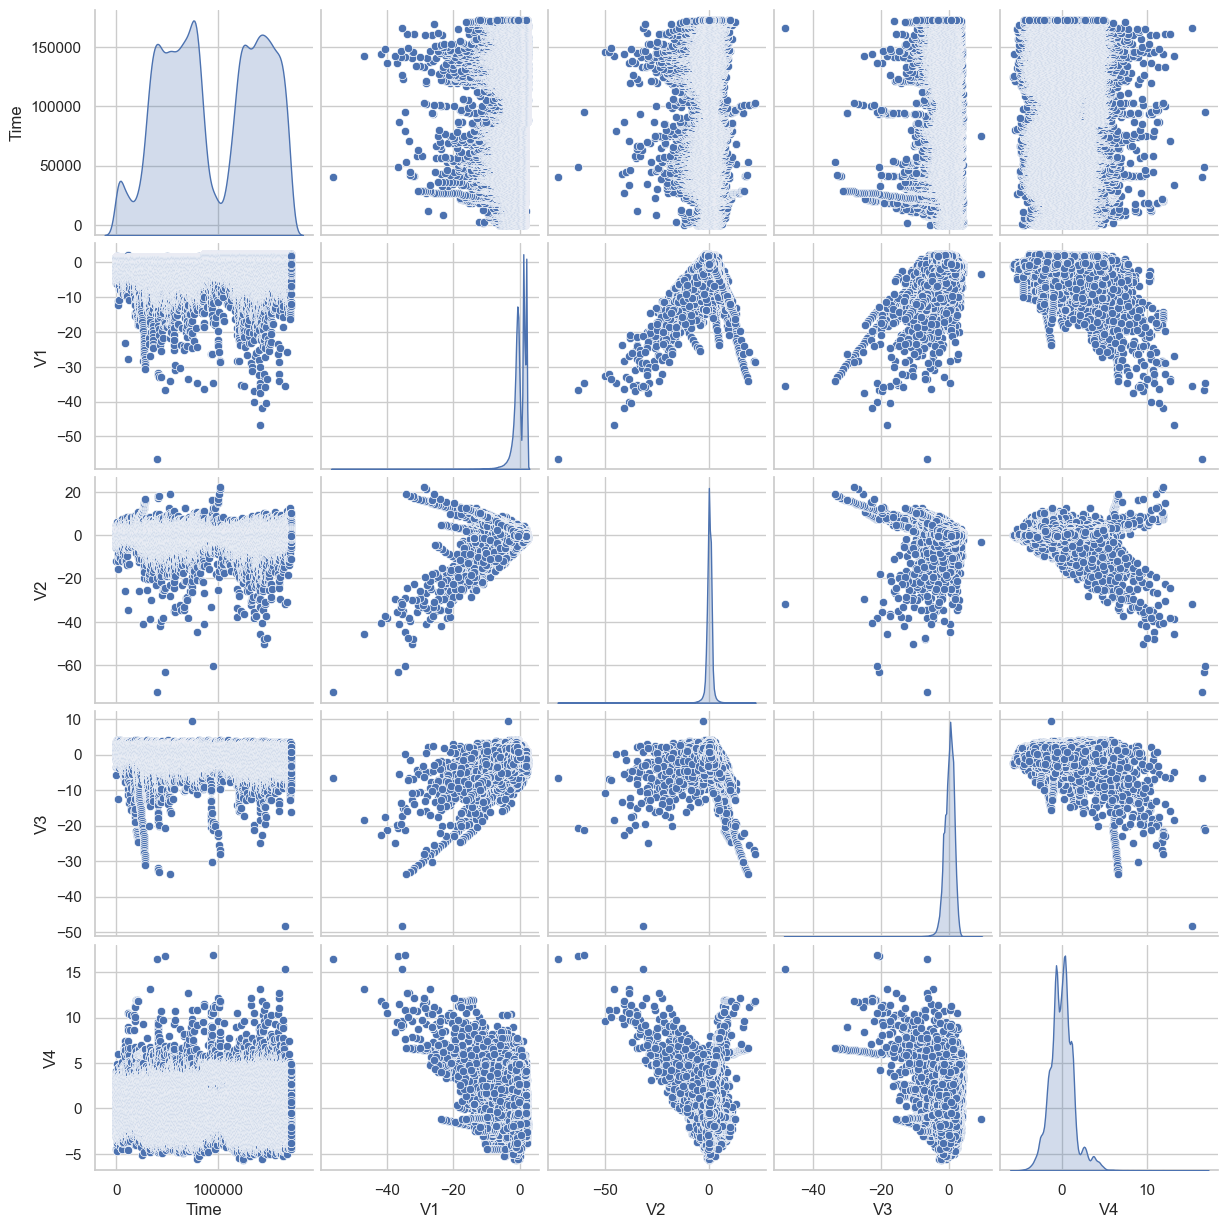

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns to avoid performance issues
sample_cols = df.columns[:5]  # Adjust column count if needed
df_sample = df[sample_cols]

# Generate pair plot
sns.pairplot(df_sample, diag_kind='kde')  # 'kde' for smooth distribution
plt.show()


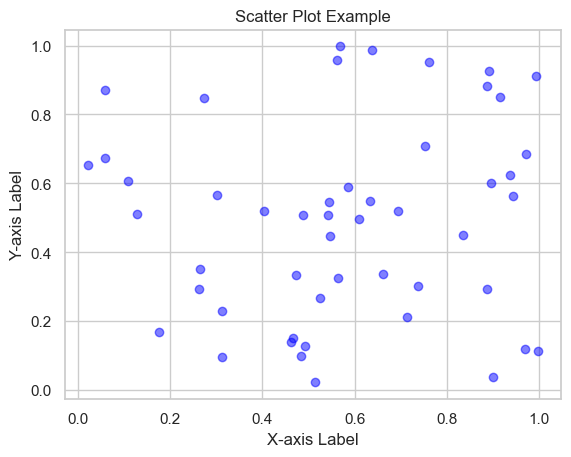

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y, color='blue', alpha=0.5)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatter Plot Example")
plt.show()
